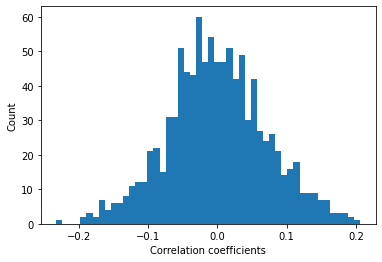

correlations mean=-0.00, std=0.07


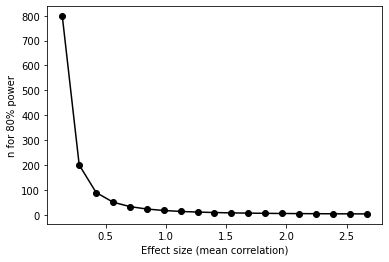

In [23]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats as sm

# Example power analysis for LC-pupil correlations (Joshi et al 2016)
# First create a null distribution of "no relationship between LC spike rate and pupil size" by simulateing a bunch of "experiments" with no effect. Here we are assuming that LC spike counts are poisson distributed with a rate of 1 Hz, and pupil has already been z-scored (so the mean is zero and the std is one)
trials_per_experiment  = 200
num_experiments = 1000
spike_rates = st.poisson.rvs(2, size=(trials_per_experiment, num_experiments))
pupils = np.random.normal(0, 1, (trials_per_experiment, num_experiments))

correlations = np.zeros(num_experiments)
for ii in np.arange(num_experiments):
    correlations[ii], _ = st.spearmanr(spike_rates[:,ii], pupils[:,ii])    

plt.hist(correlations, bins=50)
plt.xlabel('Correlation coefficients')
plt.ylabel('Count')
plt.show()
print(f'correlations mean={np.mean(correlations):.2f}, std={np.std(correlations):.2f}')

# We can perform a power analysis to find the n needed for different effect sizes at a given power (here 80%):
power = 0.8

# Define a bunch of possible effect sizes
effect_sizes = np.arange(0.01, 0.2, 0.01)/np.std(correlations)

# Compute ns, using tt_ind_solve_power (https://www.statsmodels.org/stable/index.html)
ns = np.zeros(np.size(effect_sizes))
for idx, val in enumerate(effect_sizes):
   ns[idx] = sm.power.tt_ind_solve_power(effect_size=val, alpha=0.05, power=power)

# Plot n vs effect size, where effect_size is re-scaled to std of null distribution
plt.plot(effect_sizes, ns, 'ko-')
plt.xlabel('Effect size (mean correlation)')
plt.ylabel('n for 80% power')
plt.show()